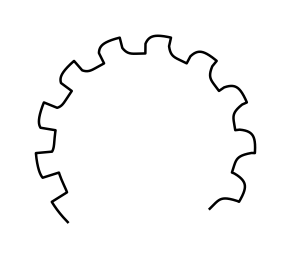

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square

# -----------------------------
# Geometry (mm)
# -----------------------------
arc_radius_mm = 8.5
amp_scale_mm = 0.8

start_angle = -3 * np.pi / 4      # bottom-left (-135°)
arc_span = 3 * np.pi / 2          # 270°
direction = -1                    # CW

# -----------------------------
# Wave / morph resolution
# -----------------------------
fs = 4000
duration = 1.0
morph_resolution = 8000

t = np.linspace(0, duration, morph_resolution, endpoint=False)

# -----------------------------
# Square wave (10 Hz)
# -----------------------------
freq = 10  # Hz
square_wave = square(2 * np.pi * freq * t)

# -----------------------------
# Simple one-pole low-pass filter (RC ×1.5)
# -----------------------------
cutoff = 15  # Hz
dt = 1 / fs
rc = 1 / (2 * np.pi * cutoff) * 1.5
alpha = dt / (rc + dt)

filtered_wave = np.zeros_like(square_wave)
for i in range(1, len(square_wave)):
    filtered_wave[i] = filtered_wave[i - 1] + alpha * (
        square_wave[i] - filtered_wave[i - 1]
    )

# -----------------------------
# Spatial morph (square → filtered)
# -----------------------------
morph = np.linspace(0, 1, morph_resolution)
wave = (1 - morph) * square_wave + morph * filtered_wave

# -----------------------------
# Arc coordinates (CW)
# -----------------------------
theta = np.linspace(
    start_angle,
    start_angle + direction * arc_span,
    morph_resolution
)

r = arc_radius_mm + amp_scale_mm * wave
x = r * np.cos(theta)
y = r * np.sin(theta)

# -----------------------------
# Compute tight bounding box
# -----------------------------
margin = 0.5  # mm margin around arc
xmin, xmax = x.min() - margin, x.max() + margin
ymin, ymax = y.min() - margin, y.max() + margin

# Keep figure square or preserve aspect ratio
width_mm = xmax - xmin
height_mm = ymax - ymin

width_in = width_mm / 25.4
height_in = height_mm / 25.4

# -----------------------------
# Plot + export + show
# -----------------------------
fig = plt.figure(figsize=(width_in, height_in), dpi=300)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, linewidth=0.6, color="black")

# Center and fit exactly
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect("equal")
ax.axis("off")

plt.savefig(
    "square_to_lowpass_arc_270deg_CW_RCx1p5_tight.png",
    dpi=300,
    transparent=True
)
plt.show()
